<a href="https://colab.research.google.com/github/nazligulsah/CS210_Introduction_to_Data_Science/blob/main/CS210_Fall2020_Report_Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [TMDB 5000 Movie Dataset - 1]


## Introduction

The film industry is one of the biggest and active industry of our days. It is also an industry dominated by a few big companies. There are new movies being made everyday, some of them breaking records in Box-Offices and some becoming cult classics, in many different genres that can connect with a lot of different people. With the monopoly of these big companies some movies have considerable budgets while some are made with limited budgets however become very popular and make great revenues. In this project we looked over our dataset to find and analyze the connections between movies popularity and revenue in regards to factors, such as budget, runtime, language and so on. We used the [TMDB 5000 Movie Dataset](​https://www.kaggle.com/tmdb/tmdb-movie-metadata)in this project. It has 20 columns that show some of the movie's attributes, such as name, budget, genre, id, revenue and so on. Also, we created a columns which called as weighted rating. Our aim for this project is to understand the correlation between a portion of factors and how they affect a movie's popularity, revenue and weighted rating. With Data Exploration and Machine Learning Models we tried to understand our dataset in regards to our aim. 


### Problem Definition

The main problem we are investigating in this project is of what factors effect the popularity or revenue and weighted rating of a movie. These factors being genre, some genres may be distinct in popularity, budget, with increase in budget the chance of popularity may also increase, and runtime, which affects people's interst differing popularity of a movie. The revenue is effected by spoken language, if the spoken language is non-English or it is less common around the world the revenue may be less, and common interest in some genres can effect the numbers in Box-Office. We are also aming to analyzing the relation between revenue, budget and profit, as well as relation between production country number and the budget. 
Moreover, we are aming to decide which one is can be our best target for maching learning part according the our results of utilized datasets and data exploration parts.


### Utilized Datasets



The data we used is named **TMDB 5000 Movie Dataset** (https://www.kaggle.com/tmdb/tmdb-movie-metadata) and have 20 columns (like genres, budget, runtime, revenue etc. they can be observed in the following outputs) that contains information about movies which are located in each row. We examined the features of the data that we used.

In [ ]:
pip install wordcloud

In [ ]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import json

%matplotlib inline
from wordcloud import WordCloud, STOPWORDS 

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


The data has 20 columns and has 4 integer type columns alongside with 3 float columns as numeric features. We decided to use budget (integer), runtime(float), popularity (float) and also made observations on the spoken languages as well as the original language of the movies.

In [ ]:
fname = "tmdb_5000_movies.csv"
df = pd.read_csv(join(path_prefix, fname)) 
print("Data Types of the Columns:")
print(df.dtypes,"\n")
print("The Shape of the Data (rows, columns):",df.shape)

Data Types of the Columns:
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object 

The Shape of the Data (rows, columns): (4803, 20)


When we observed the **original language** column, we saw that 4505 of 4803 movies had English as the original language and it was followed by French and Spanish. So that we needed to use log graph in order to observe the difference in distribution more clearly. Given most of the movies have the same original language, having it as a feature would not be rational for our predictions. 

Number of movies which their original language is English: 4505 



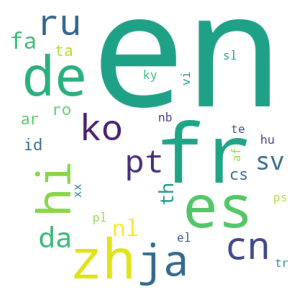

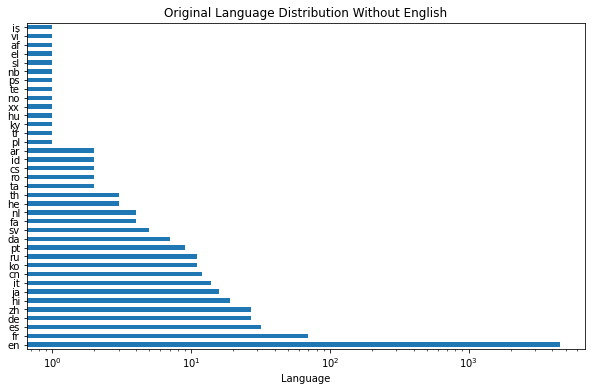

In [ ]:
index = df[df["original_language"]=="en"].index
number_of_rows = len(index)
print("Number of movies which their original language is English:",number_of_rows,"\n")

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(df['original_language']))
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show() 
d=df
fig, ax= plt.subplots(figsize=(10,6))
ax = d["original_language"].value_counts().plot(kind="barh")
ax.set_title("Original Language Distribution Without English")
ax.set_xlabel("Language")
ax.set_xscale('log')
plt.show()

The second column we observed was **genres** column. That column's cells contained JSON type objects so that we needed to iterated over them to access the genre names. A movie had more than one genre, we summed every distinct genre we found. Output was the number of movies that each genre appeard in sorted order. 

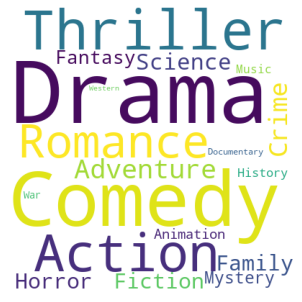

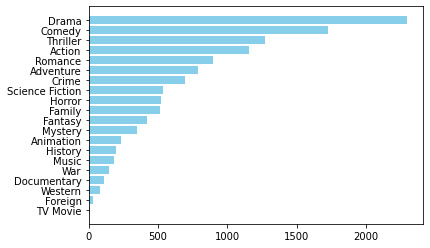

In [ ]:
g=[]
c=[]
all=[]
for idx,r in df.iterrows():
  df_genres = json.loads(df["genres"][idx])
  for r1 in df_genres:
    all.append(r1["name"])
    if r1["name"] in g:
      g_index = g.index(r1["name"])
      c[g_index]+=1
    else:
      g.append(r1["name"])
      c.append(1)

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,collocations=False).generate(' '.join(all))
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show() 

zipped = zip(g, c) 
# Converting to list 
zipped = list(zipped) 
# Using sorted and lambda 
res = dict(sorted(zipped, key = lambda x: x[1]))
ax=plt.barh(list(res.keys()),list(res.values()),color="skyblue")
plt.show()

We then observed the budget column (which we used for our predictions) and revenue columns with histograms. It can be observed that most movies in our data has a budget less than 42 million dllars while most of the movies' revenue is much higher than that. This shows the movies tend to make profit (profit statistics can be observed in the next section).

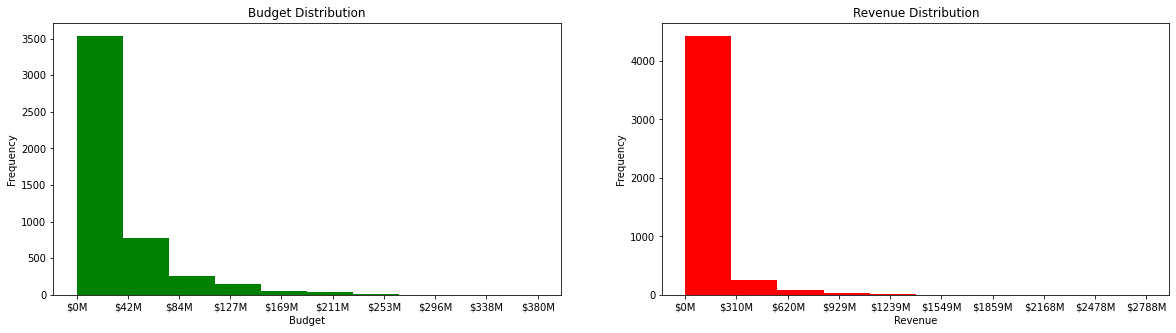

In [ ]:
fig= plt.subplots(figsize=(20,5))
axes = [plt.subplot(121),plt.subplot(122)]
ax = df["budget"].plot.hist('scott',ax=axes[0],color="green") #scott
xlocs = np.linspace(0, df["budget"].max(), 10)
ax.set_xticks(xlocs)
ax.set_xticklabels([f"${i/1000000:.0f}M" for i in xlocs])
ax.set_title("Budget Distribution")
ax.set_xlabel("Budget")

ax2=df["revenue"].plot.hist('scott',ax=axes[1],color="red")
xlocs2 = np.linspace(0, df["revenue"].max(), 10)
ax2.set_xticks(xlocs2)
ax2.set_xticklabels([f"${i/1000000:.0f}M" for i in xlocs2])
ax2.set_title("Revenue Distribution")
ax2.set_xlabel("Revenue")
plt.show()

We then observed another numeric column which we used in our predictions, the runtime of the movies. We created a histogram that shows the distribution of the runtime among the movies. Most movies seem to have around 100 minutes of runtime.

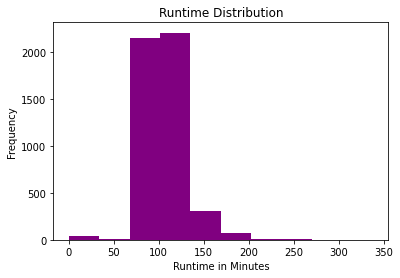

In [ ]:
ax3=df["runtime"].plot.hist(bins=10,color="purple")
xlocs3 = np.linspace(0, df["runtime"].max(), 10)
ax3.set_title("Runtime Distribution")
ax3.set_xlabel("Runtime in Minutes")
plt.show()

The production countries colum contained JSON objects too. We iterated over the rows and created a new column that shows how many production countries a movie has. Not the names of the countries but the number of them would be used as an impact on budget or popularity in the future observations.

We have created 4 new columns which refer to genre number, production companies number, country number and weighted average. In our original dataset, genres, production companies and production countries are object type to be utilzied them in our project we convert them to integer type. Our original dataset we do not have weighted rating we add this column. To create this column we used an IMDb weighted rating fuction which consist of average of the rating, number of votes, minimum votes in the list and the mean vote. The first 3 was created in order to be used as features in our model while weighted average became our target.

In [ ]:
df["genre_number"]=""
for i,r in df.iterrows():
  df_c = json.loads(df["genres"][i])
  df.at[i,'genre_number']=0
  for r2 in df_c:
    df.at[i,'genre_number']+=1

In [ ]:
df["prod_number"]=""
for i,r in df.iterrows():
  df_c = json.loads(df["production_companies"][i])
  df.at[i,'prod_number']=0
  for r2 in df_c:
    df.at[i,'prod_number']+=1

In [ ]:
df["country_number"]=""
for i,r in df.iterrows():
  df_c = json.loads(df["production_countries"][i])
  df.at[i,'country_number']=0
  for r2 in df_c:
    df.at[i,'country_number']+=1

weighted rating (WR)=(v/(v+m))*R+(m/(v+m))*C 
<br>where: 
<br>R = average for the movie (mean) = (Rating) 
<br>v = number of votes for the movie = (votes) 
<br>m = minimum vote in the list
<br>C = the mean vote across the whole data

In [ ]:
R = df["vote_average"]
v = df["vote_count"]
m = v.min()
C = R.mean()
df["weighted_rating"]= (v/(v+m))*R+(m/(v+m))*C

In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_number,prod_number,country_number,weighted_rating
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,4,4,2,7.2
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,3,3,1,6.9
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,3,3,2,6.3
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,4,4,1,7.6
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,3,1,1,6.1


In [ ]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
genre_number             object
prod_number              object
country_number           object
weighted_rating         float64
dtype: object

## Data Exploration



In the Data Exploration part, our purpose is that searching the relationship between popularity and the utilized datasets which are budget, revenue, profit, runtime, genres and spoken languages.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from sklearn.metrics import r2_score
import json

%matplotlib inline
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_number,prod_number,country_number,weighted_rating
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,4,4,2,7.2
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,3,3,1,6.9


To organize our data we copy the dataframe which we need to use for our research. New data consists of 4803 rows and 6 columns. 

In [ ]:
d = df
df = df[["budget","genres","popularity","revenue","runtime","spoken_languages"]].copy()
print(df.dtypes) 
print(df.shape)

budget                int64
genres               object
popularity          float64
revenue               int64
runtime             float64
spoken_languages     object
dtype: object
(4803, 6)


In this scatter plot, we plotted the relationship between popularity and budget. The X-axis represents the budget and the y-axis represents popularity in terms of a logarithm. According to the plot, we argue that high budgets cannot guarantee high popularity. The data shows that the most popular moves mostly the ones that are produced by the intermediate budget. According to the corrcoef function, there is a positive correlation between budget and popularity.


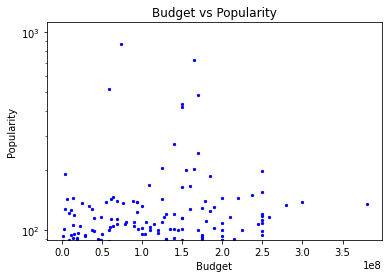

array([[1.      , 0.505414],
       [0.505414, 1.      ]])

In [ ]:
#Budget vs Popularity

df_popularity = df["popularity"].to_list()
df_budget     = df["budget"].to_list()


plt.scatter(df_budget, df_popularity, c ="blue", s = 5)

plt.ylabel("Popularity") 
plt.xlabel("Budget") 
plt.yscale("log")
#plt.grid(True)
plt.title("Budget vs Popularity")
plt.show() 
np.corrcoef(df_popularity,df_budget)

In our second scatter plot, we plotted the relationship between revenue and popularity. The x-axis represents the revenue and the y-axis represents the popularity in terms of logarithm like our first scatter plot. There is a stronger correlation in revenue vs popularity than budget vs popularity. 

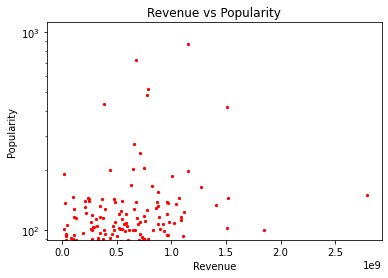

array([[1.       , 0.6447235],
       [0.6447235, 1.       ]])

In [ ]:


df_popularity = df["popularity"].to_list()
df_revenue    = df["revenue"].to_list()


plt.scatter(df_revenue, df_popularity, c ="red", s = 5)

plt.ylabel("Popularity") 
plt.xlabel("Revenue") 
plt.yscale("log")
#plt.grid(True)
plt.title("Revenue vs Popularity")
plt.show() 
np.corrcoef(df_popularity,df_revenue)

In our original data, there was no profit column so we obtain it by substrating revenue from the budget to create the profit vs popularity scatter plot. The X-axis represents the profit and the y-axis represent the popularity in terms of logarithm like our first and second scatter plot. There is a similar correlation between profit vs popularity and revenue vs popularity.

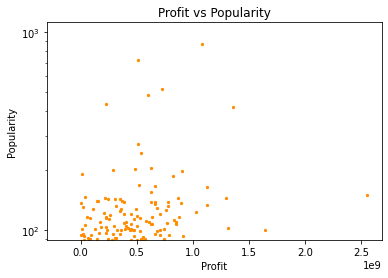

array([[1.        , 0.62085432],
       [0.62085432, 1.        ]])

In [ ]:
#Profit vs Popularity
df["profit"] = df["revenue"] - df["budget"]

df_popularity = df["popularity"].to_list()
df_profit     = df["profit"].to_list()


plt.scatter(df_profit, df_popularity, c ="darkorange", s = 5)

plt.ylabel("Popularity") 
plt.xlabel("Profit") 
plt.yscale("log")
#plt.grid(True)
plt.title("Profit vs Popularity")
plt.show() 
np.corrcoef(df_popularity,df_profit)


In this bar graph, we graphed the relationship between genres and popularity. The x-axis represents 20 genres. In our data, for every movie there is at least one genre so for that reason we find the frequency for every genre. For the y-axis for every genre, we count every popularity for single genres then we divide the number of movies and find the mean of popularity for every genre. The top 5 genres are adventure, animation, science fiction, fantasy, and action.  

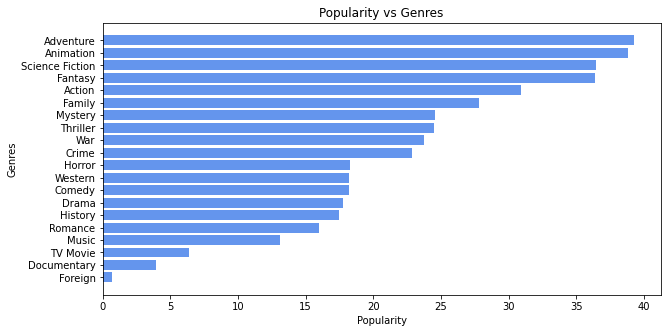

In [ ]:
popu = []
popu_count = []
genr = []
for index,row in df.iterrows():
  df_genre = json.loads(df["genres"][index])
  for r2 in df_genre:
    if r2["name"] in genr:
      genre_index = genr.index(r2["name"])
      popu[genre_index] += df["popularity"][index]
      popu_count[genre_index]=popu_count[genre_index]+1
    else:
      genr.append(r2["name"])
      popu.append(0)
      popu_count.append(0)

      genre_index = genr.index(r2["name"])
      popu[genre_index] += df["popularity"][index]
      popu_count[genre_index]=popu_count[genre_index]+1


popularity_by_id = [i / j for i, j in zip(popu, popu_count)] 
#print(popularity_by_id)
 
fig = plt.figure(figsize = (10, 5)) 
  
popularity_by_genres = zip(popularity_by_id, genr)
#popularity_by_genres = zip(popu_count, genr)
popularity_by_genres = sorted(popularity_by_genres, reverse=False)
popularity_by_id, genr = zip(*popularity_by_genres)

# creating the bar plot 
plt.barh(genr, popularity_by_id, color ='cornflowerblue') 
#plt.grid(True)
plt.ylabel("Genres") 
plt.xlabel("Popularity") 
plt.title("Popularity vs Genres") 
plt.show() 

There is a bar graph that represents the relationship between runtime and popularity. The x-axis shows runtime interval to obtain x-axis firstly, we replace nan value to 0 and then we drop all 0 rows by dropna function. Moreover, we separated the interval for runtime. To obtain runtime intervals we use a loop in range length of runtime and else-if statements. The smallest interval of 0-30 minutes and after that every interval increases by 30 minutes. The longest runtime for a movie is 338 minutes. For the y-axis, we calculated the mean popularity of every runtime interval. The shape of our graph looks like a bell-curve so we argue that 150-180 minutes interval is key to producing a popular movie. Until 150 minutes there is a positive correlation and after 180 minutes there is a negative correlation in our graph.

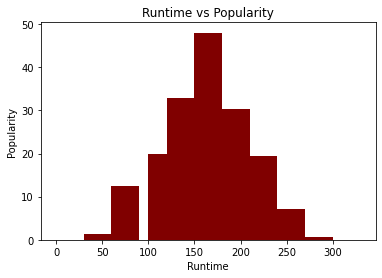

In [ ]:
#Runtime vs Popularity

df_for_runtime = df[["runtime","popularity"]].copy()

#print(df.iloc[:,1:5].isnull().sum)
df_for_runtime = df_for_runtime.replace(0, np.nan)
df_for_runtime.dropna()
df_popularity = df_for_runtime["popularity"].to_list()
df_runtime    = df_for_runtime["runtime"].to_list()

bins  = [15,45,75,115,135,165,195,225,255,285,315,345]
bins_f= [1, 1, 1, 1,  1,  1,  1,  1,  1,  1,  1,  1]
popu_f= [0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0]

for i in range(len(df_runtime)):
  j = df_runtime[i]
  k = df_popularity[i]
  if j > 330:
    bins_f[11]= bins_f[11]+1
    popu_f[11]= popu_f[11]+k
  elif j > 300:
    bins_f[10]= bins_f[10]+1
    popu_f[10]= popu_f[10]+k
  elif j > 270:
    bins_f[9]= bins_f[9]+1
    popu_f[9]= popu_f[9]+k
  elif j > 240:
    bins_f[8]= bins_f[8]+1
    popu_f[8]= popu_f[8]+k
  elif j > 210:
    bins_f[7]= bins_f[7]+1
    popu_f[7]= popu_f[7]+k
  elif j > 180:
    bins_f[6]= bins_f[6]+1
    popu_f[6]= popu_f[6]+k
  elif j > 150:
    bins_f[5]= bins_f[5]+1
    popu_f[5]= popu_f[5]+k
  elif j > 120:
    bins_f[4]= bins_f[4]+1
    popu_f[4]= popu_f[4]+k
  elif j > 90:
    bins_f[3]= bins_f[3]+1
    popu_f[3]= popu_f[3]+k
  elif j > 60:
    bins_f[2]= bins_f[2]+1
    popu_f[2]= popu_f[2]+k
  elif j > 30:
    bins_f[1]= bins_f[1]+1
    popu_f[1]= popu_f[1]+k
  else:
    bins_f[0]= bins_f[0]+1
    popu_f[11]= popu_f[11]+k

df_popularity = [i / j for i, j in zip(popu_f, bins_f)] 

#plt.scatter(df_runtime, df_popularity, c ="darkorange", s = 5)
#plt.bar(df_runtime, df_popularity, color ='maroon', width = 0.4) 
plt.bar(bins, df_popularity, color ='maroon', width = 30) 


plt.ylabel("Popularity") 
plt.xlabel("Runtime") 
#plt.yscale("log")
#plt.grid(True)
plt.title("Runtime vs Popularity")
plt.show() 



In our bar graph showing the relationship between spoken languages in the movies and popularity for every language. The y-axis represents 87 spoken languages. In the data spoken languages are shown iso code of languages ("iso_639_1"). Like genres vs popularity graph, There is more than one language for a movie. So we calculated the mean popularity for every spoken language for the x-axis.  

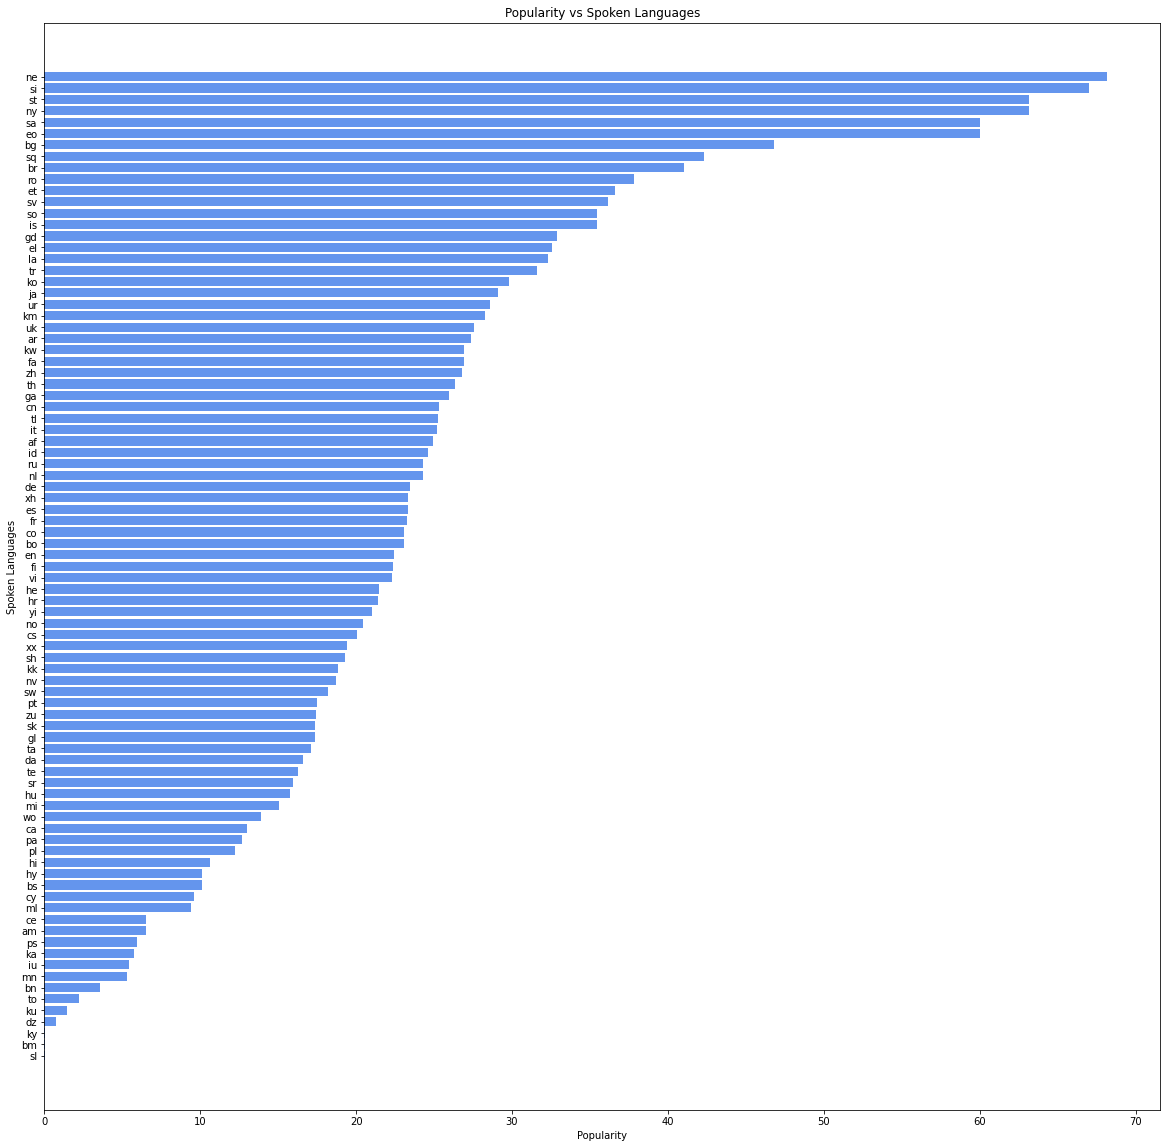

In [ ]:
popu = []
popu_count = []
genr = []
genr_D = []
for index,row in df.iterrows():
  df_genre = json.loads(df["spoken_languages"][index])
  for r2 in df_genre:
    if r2["iso_639_1"] in genr:
      genre_index = genr.index(r2["iso_639_1"])
      popu[genre_index] += df["popularity"][index]
      popu_count[genre_index]=popu_count[genre_index]+1
    else:
      genr.append(r2["iso_639_1"])
      #genr.append(r2["name"])
      popu.append(0)
      popu_count.append(0)

      genre_index = genr.index(r2["iso_639_1"])
      popu[genre_index] += df["popularity"][index]
      popu_count[genre_index]=popu_count[genre_index]+1


popularity_by_id = [i / j for i, j in zip(popu, popu_count)] 

fig = plt.figure(figsize = (20, 20)) 
  
popularity_by_spoken_languages = zip(popularity_by_id, genr)
popularity_by_spoken_languages = sorted(popularity_by_spoken_languages, reverse=False)
popularity_by_id, genr = zip(*popularity_by_spoken_languages)

# creating the bar plot 
plt.barh(genr, popularity_by_id, color ='cornflowerblue') 
#plt.grid(True)
plt.ylabel("Spoken Languages") 
plt.xlabel("Popularity") 
plt.title("Popularity vs Spoken Languages") 
plt.show() 


  


## Machine Learning Models

<font color="black">
We have tested two machine learning models (Decision Tree and Random Forest) using "budget" and "runtime" as features and "popularity" as the target. Then observed the Mean Squared Error that the models give. 
</font>

"**The Mean Squared Error (MSE)** of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. It is a risk function, corresponding to the expected value of the squared error loss. It is always non – negative and **values close to zero are better**. The MSE is the second moment of the error (about the origin) and thus incorporates both the variance of the estimator and its bias." (GeeksforGeeks: https://www.geeksforgeeks.org/python-mean-squared-error/)

### Implementation

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df=d

### Decision Tree

We first tried Decision Tree model to predict the popularity given budget and runtime. We dropped all the NaN values so that the model can work properly. We then splitted the data, we defined our feature variable (X) as a dataframe that only have budget and runtime columns and our target variable (y) as a dataframe that have only popularity column. Then we splitted our data using train_test_split function which gets our X and y dataframes and the percentage value we want to have as the test data. We gave 80% of the data for training (for the model to learn) and 20% data remained. Then we splitted remaining data in half, we got validation and test data. At the end; 80% of our data became training data, 10% of it is preserved as validation data and 10% of it as the test data.

We then created our model and trained it with our training data (X_train, y_train). We made the model make predictions on the test data we have preserved and find y predictions according to what it has learned from the training data.

We then found the mean squared error which gives the amount of error our prediction have by comparing the test data (y_test) we preserved and the predicted y values. Our mean squared error output was very high. This tells us that our inputs were not enough or even wrong for predicting our target. The model could not learn many useful information and could not predict the target right. 

In [ ]:
df.dropna(inplace=True)
df.head()
# features
X = df[["budget","runtime"]]
# target attribute
y = df["popularity"]
# 80% training, 20% for validation and testing
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state=0, test_size=0.20)
# divide the remaining part into two
# at the end, you get 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)

#create a model
model = DecisionTreeRegressor(criterion="mse") 
model.fit(X_train, y_train) #we train the model
# predict the validation data
y_pred = model.predict(X_test)  
# perform CV with the given settings
print("Features: budget, runtime")
print("Target: popularity")
print("Mean Squared Error of Decision Tree Regressor:",mean_squared_error(y_test, y_pred, squared=False))

Features: budget, runtime
Target: popularity
Mean Squared Error of Decision Tree Regressor: 41.92858781258879


**The error in our first Decision Tree was very high. After we decided to change our features as "budget","runtime","country_number","prod_number","genre_number" and our target as "weighted_rating" which is a column we added to the data; we applied decision tree model again. This time, our predictions became much less erroneous. We got MSE results around 1.1.**

In [ ]:
df.dropna(inplace=True)
df.head()
X = df[["budget","runtime","country_number","prod_number","genre_number"]]  
# target attribute
y = df["weighted_rating"]
# 80% training, 20% for validation and testing
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state=0, test_size=0.20)
# divide the remaining part into two
# at the end, you get 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)

#create a model
model = DecisionTreeRegressor(criterion="mse") 
model.fit(X_train, y_train) #we train the model
# predict the validation data
y_pred = model.predict(X_test)  
# perform CV with the given settings
print("Features: budget, runtime,country_number,prod_number, genre_number")
print("Target: weighted_rating")
print("Mean Squared Error of Decision Tree Regressor:",mean_squared_error(y_test, y_pred, squared=False))


Features: budget, runtime,country_number,prod_number, genre_number
Target: weighted_rating
Mean Squared Error of Decision Tree Regressor: 1.1265332579236416


###Random Forest

Our second model was Random Forest. We splitted data as train and test data, gave test size as 0.25 so that we would keep 25% of our data for testing and use 75% for training the model. We determined estimator number in the random forest (which are decision trees in the forest, the number of them shows how many estimation we make.). We trained the model with the training data and made a prediction about target using X_test data we have set aside. We then used this prediction and the target test data to check the Mean Squared Error of our model. The output was once again really high, but lower than the decision tree model's. 

We used a new version of random forest by setting max depth of it as 2, we once again trained the model and made a prediction. When we calculated the mean squared error of this new version, we saw that even though it was still high, it was lower than the decision tree model and the first version of the random forest model.


Old outcomes:
<br>Random Forest Mean Squared Error: 30.84926963314338
<br>Random Forest with max_depth=2 Mean Squared Error: 28.750896945073926


**The MSE's in our first Random Tree model were lower than the Decision Tree's but was still so high as it can be seen above. After we changed our features and our target, we made the predictions on the validation data using Random Forest Regressor model and got very little errors around 0.9.**

In [ ]:
# 80% training, 20% for validation and testing
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state=0, test_size=0.20)
# divide the remaining part into two
# at the end, you get 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50)

#Random Forest Training(In new version default of estimators will be 100)
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

#Random Forest Testing
rf_predictions = model_rf.predict(X_val)
rf_mse=mean_squared_error(y_val, rf_predictions, squared=False)
print("Random Forest Mean Squared Error:",rf_mse)

#Random Forest Training(In new version default of estimators will be 100) with max_depth=2
model_rf = RandomForestRegressor(max_depth=2)
model_rf.fit(X_train, y_train,)

#Random Forest Testing with max_depth=2
rf_predictions2 = model_rf.predict(X_val)
rf_mse2=mean_squared_error(y_val, rf_predictions2, squared=False)
print("Random Forest with max_depth=2 Mean Squared Error:",rf_mse2)


Random Forest Mean Squared Error: 0.9325511941672311
Random Forest with max_depth=2 Mean Squared Error: 0.9327874329768723


# Feature Importance
We looked at the most important features in our random forest model to determine which parameter is the most significant. Runtime turned out to be the most important feature in our model. Runtime and popularity graph also had an almost perfect bell curve. Having a consitent relationship between popularity and runtime halped our model to train better before. After we changed our target runtime was still the most important feature. We can conclude that keeping runtime in a specific range is important to attract the attention of the viewers. The second most important feature is the budget. Budget clearly has an important role in making a movie successful so it is not surprising to see that the budget is an important feature.

Feature Importances List:
Variable: runtime   Importance: 0.982
Variable: budget   Importance: 0.013
Variable: prod_number   Importance: 0.004
Variable: country_number   Importance: 0.001
Variable: genre_number   Importance: 0.0
[0.982, 0.013, 0.004, 0.001, 0.0]
['runtime', 'budget', 'prod_number', 'country_number', 'genre_number']


Text(0.5, 1.0, 'Most Important Features of the Initial Model')

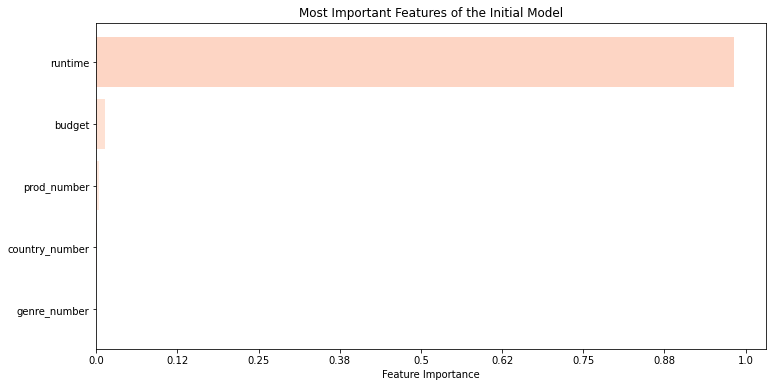

In [ ]:
#feature importances
from matplotlib import cm

# feature_importances_ attribute of a Random Forest model instance.
feature_list = list(X_train.columns)

# Get importance list from model
importances = list(model_rf.feature_importances_)

feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1],reverse=True)

cmap = cm.Reds(np.linspace(0,2))

print("Feature Importances List:")
for pair in feature_importances:
  print("Variable: {:2}   Importance: {}".format(*pair))

fig, ax = plt.subplots(figsize=(12, 6))
x=[]
y=[]
for item in feature_importances:
    x.append(item[1])
    y.append(item[0])
x.reverse()
y.reverse()
xlocs = np.linspace(0, 1, 9)
ax.set_xticks(xlocs)
ax.set_xticklabels([round(i,2) for i in xlocs])
ax.barh(y,x,color=cmap)
plt.xlabel("Feature Importance")
plt.title("Most Important Features of the Initial Model")

# Grid Search
We wanted to even lower our error on our machine learning model so we used the grid search to hyper tune our model. We used the parameters below to tinker with the random forest model.
'min_samples_split': [2, 4,6],
'n_estimators': [100, 200, 300]

In [ ]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#Train Random Forest instances with the given parameter space using GridSearchCV,

# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

#Compare the accuracy score you obtained here with the accuracy score of the initial model.

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   11.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

With the gird search, we perfected our parameters. Grid search found n_estimators as 300 and min_samples_split 6 as best resulting parameters within given parameters.



In [ ]:
# Displaying best hyperparameters
grid_search.best_params_

{'min_samples_split': 6, 'n_estimators': 300}


When best parameters plug in the random forest and predicted with validation data mean squared error turned out to be around 1.2 which is significently higher than the previous model so in this case hyperparameter tuning in our model was unnecesary. The default values of Random Forest Regressor worked better.



In [ ]:
grid_preds = grid_search.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

1.218509376521634

### KNN

The third model we used, KNN (K Nearest Neighbor), resulted better when K is higher after we checked K values from 1 to 39 and compared the MSE's. However, the mean squared error is higher compared to the other two models.

We decided not to continue to use KNN with our new features and the new target. However, we realized that we were making predictions on the test data and changed it to the validation data.

[68.44525197315991, 65.84129290445263, 63.84388794450756, 62.68213824924123, 63.51495414181686, 62.725229102171255, 63.158369937765386, 64.30652329150197, 65.29672174703327, 65.22292755297273, 65.55069052915488, 63.492970899820556, 63.72443834249667, 63.9060297412726, 64.43960982958063, 64.60610114468663, 64.38935917621924, 65.11128992350064, 65.51871459219055, 65.80553947927574, 65.7577394482401, 65.5378931224946, 65.76562857589846, 65.91439993116383, 65.92971021760333, 66.18699549883218, 66.22643857084483, 66.44755045788197, 66.47489314969769, 66.51781340966902, 66.40851211987683, 65.58483763712324, 65.58625847502012, 65.70536699976422, 65.72734049511227, 65.78316218272704, 65.97741234007856, 66.0254047776944, 66.13584588317097]


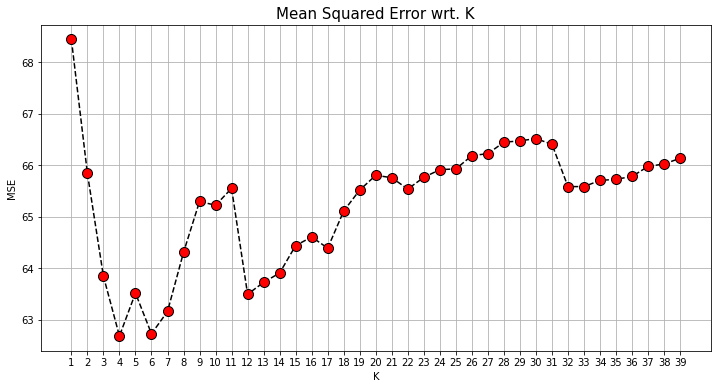

In [ ]:
#runtime vs popularity
# separate features and the target column
# features
X = df[["budget","runtime"]]
# target attribute
y = df["popularity"]

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

K_range = np.arange(1, 40)
score_list = []

for k in K_range:
  # create a new model with current K
  knn = KNeighborsRegressor(k, metric="euclidean")
  # fit training data
  knn.fit(X_train, y_train)
  # predict the validation data
  y_pred = knn.predict(X_val)
  # obtain the accuracy value
  score = mean_squared_error(y_val, y_pred, squared=False) #mse 
  score_list.append(score)

print(score_list)
plt.figure(figsize=(12, 6))  
plt.plot(K_range, score_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Mean Squared Error wrt. K', fontsize=15)  
plt.xlabel('K')  
plt.ylabel('MSE')
plt.xticks(K_range)
plt.grid()
plt.show()

# create a new model with current K
knn = KNeighborsRegressor(5, metric="euclidean") #regressor
# fit training data
knn.fit(X_train, y_train)
# predict the validation data
y_pred = knn.predict(X_test)

### Results & Discussion

The models we used were Decision Tree, Random Forest and KNN. For the first part of the project KNN did not result as we expected, MSE of that model's prediction were higher than the other two. Random Forest's results suited our problem the best, however, the MSE was still high, we then used revenue and popularity as our targets and saw that we had big errors and concluded our target to be the weighted average rating and added new features. Calculating weighted rating turned out to be a better and less flawed model. Both Random Forest and Decision Tree came out better, with our Random Forest result being around 0.9 best params output being 1.22.




## Conclusion

Our starting point was to evaluate the relation between different columns. However, the columns we chose did not create decent predictions when our first models were applied. In ML implementation, there have been some results with high error which shows the budget and runtime has not have the power to affect popularity as we expected.Therefore, for the final part of the project we changed our target and added new features. By increasing our features, adding country number, production company number and genre number alongside budget and runtime and also having the target as the weighted rating we saw that the model became very effective since the error was low. It can be concluded that weighted average rating which shows audience's satisfaction about a movie according to IMDb is affected by our features.


## Future Work

Our plan after the progress report:
<br>Since we did not result with a good prediction, the data columns may be manipulated (for example vote, language or genre columns) and more columns may be included in the inputs. Also, profit and revenue may be tried as the target column since they are features that are shaped after the release of the movie just like the popularity. Other than the manipulations on the data and change on the inputs or outputs, new models can be tested. Moreover, with the manipulation of the data, the problem may be changed as a classification problem rather than a regression problem. The continuous columns may be seperated to the classes. Our aim for the final report is to manipulate our hypothesis for it to be a more strong one, find the best fitting model to our problem and result in a good prediction on the revenue/popularity/profit of a movie.


For future work of this project other models may be also used and the errors may even be lowered more. Also, by separating classes the success of a movie may be measured by classification problems. In the movie industry using features such as budget, runtime and production company number in a more efficient way may result in making more successful movies that fit with audience's interest. Furthermore, with using other new models more features may be added to consideration to create more successful movies. 


## Work Division
<p>Lara Pole:  Writing the Introduction and Problem Definition parts.
<br>Nazlı Gülşah Önen and Yiğit Kılıçaslan: Data Exploration (both coding and discussion)
<br>Ayşegül Rana Erdemli: Utilized Datasets and Machine Learning parts (both coding and discussion)
<br>Results & Discussion, Conclusion, Future Work parts were completed as a group.
</p>



## Final Report Work Division
<p>Lara Pole:  Results & Discussion, Conclusion, Future Work
<br>Nazlı Gülşah Önen: Problem Definition edit, Utilized Datasets additional parts
<br>Yiğit Kılıçaslan & Ayşegül Rana Erdemli: ML parts explanations
<br> The new coding parts in the utilized datasets and the ML parts were completed as a group.
</p>